# Checkpoint 1

A partir do dataset enviado, responda:

## Importação e Análise Inicial

1. Importe o arquivo CSV.(0,33)
2. Quantas linhas tem o dataset?(0,33)
3. Quantas colunas tem o dataset?(0,33)
4. Quais colunas têm o tipo `object`?(0,34)
5. Quais colunas têm o tipo `int64`?(0,34)
6. Existe alguma coluna de outro tipo?(0,33)

## Análise Estatística

7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

## Análise de Categorias

10. Qual a `category` mais presente? E quantos valores únicos ela possui?(0,5)
11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?(0,5)
12. Qual a `currency` mais presente? E quantos valores únicos ela possui?(0,5)
13. Execute o processo de dummy na coluna `country`.(0,5)

## Análise de Valores Nulos

14. Qual a quantidade de valores nulos em cada feature?(0,66)
15. Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)
16. Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)

## Visualização Gráfica

17. Visualização Gráfica da feature `state`.(2)



----------------------------------------
🧩 Desafio: ETL de Dados Públicos

🎯 Objetivo
Construir um pipeline ETL no Apache Airflow que:

Extrai dados de algum dataset público

Transforma os dados limpando, filtrando e unificando informações.

Carrega o resultado em um banco de dados PostgreSQL (ou salva como Parquet).

Agenda a execução diária do pipeline (simulando ingestão incremental).

In [31]:
!pip install pandas matplotlib seaborn

  Using cached matplotlib-3.10.7-cp314-cp314-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp314-cp314-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp314-cp314-macosx_11_0_arm64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp314-cp314-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
#1 import csv
df = pd.read_csv('resources/precos-gasolina-etanol-07.csv', sep=';', decimal=',')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44623 entries, 0 to 44622
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     44623 non-null  object 
 1   Estado - Sigla     44623 non-null  object 
 2   Municipio          44623 non-null  object 
 3   Revenda            44623 non-null  object 
 4   CNPJ da Revenda    44623 non-null  object 
 5   Nome da Rua        44623 non-null  object 
 6   Numero Rua         44617 non-null  object 
 7   Complemento        9533 non-null   object 
 8   Bairro             44556 non-null  object 
 9   Cep                44623 non-null  object 
 10  Produto            44623 non-null  object 
 11  Data da Coleta     44623 non-null  object 
 12  Valor de Venda     44623 non-null  float64
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  44623 non-null  object 
 15  Bandeira           44623 non-null  object 
dtypes: float64(2), object(

In [38]:
#7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
#8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
#9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

#10. Qual a `category` mais presente? E quantos valores únicos ela possui?(0,5)
#11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?(0,5)
#12. Qual a `currency` mais presente? E quantos valores únicos ela possui?(0,5)
#13. Execute o processo de dummy na coluna `country`.(0,5)

# 7,8 e 9
print('---')
print(df['Valor de Venda'].describe())
print('---')
print(df['Produto'].describe())
print('---')
print(df['Revenda'].describe())
print('---')

---
count    44623.000000
mean         5.686718
std          1.013775
min          3.090000
25%          4.790000
50%          5.990000
75%          6.390000
max          9.390000
Name: Valor de Venda, dtype: float64
---
count        44623
unique           3
top       GASOLINA
freq         17021
Name: Produto, dtype: object
---
count                                      44623
unique                                      5050
top       CASCOL COMBUSTIVEIS PARA VEICULOS LTDA
freq                                         462
Name: Revenda, dtype: object
---


In [39]:
# 9.Distribuição por tipo de produto
print('Distribuição por tipo de produto')
print(df['Produto'].value_counts(normalize=True) * 100)

# 10.Bandeiras mais frequentes
print('---')
print('Bandeiras mais frequentes')
print(df['Bandeira'].value_counts().head(10))
# 11.Bandeiras mais frequentes
print('---')
print('Top estados com media mais cara')
df.groupby('Estado - Sigla')['Valor de Venda'].mean().sort_values(ascending=False)


Distribuição por tipo de produto
Produto
GASOLINA              38.144006
ETANOL                31.974542
GASOLINA ADITIVADA    29.881451
Name: proportion, dtype: float64
---
Bandeiras mais frequentes
Bandeira
BRANCA      14007
VIBRA       10457
IPIRANGA     9714
RAIZEN       6717
ALE          1182
SABBÁ         544
RODOIL        220
ATEM' S       204
CHARRUA       168
EQUADOR       143
Name: count, dtype: int64
---
Top estados com media mais cara


Estado - Sigla
AC    7.170168
AM    6.775175
RR    6.634639
RO    6.498249
SE    6.240040
PA    6.176480
DF    6.098504
CE    6.079467
RS    6.028339
AP    6.006692
SC    5.990370
AL    5.956958
TO    5.904625
PE    5.882906
MA    5.843841
RN    5.843641
BA    5.811477
ES    5.767765
PR    5.725013
MS    5.690923
RJ    5.686401
PI    5.589309
PB    5.533438
MG    5.495877
GO    5.495412
SP    5.397443
MT    5.293511
Name: Valor de Venda, dtype: float64

In [40]:
# Dummyes everywhere
cols_cat = [
    'Regiao - Sigla',
    'Estado - Sigla',
    'Municipio',
    'Produto',
    'Bandeira',
    'Unidade de Medida'
]

df_dummies = pd.get_dummies(df, columns=cols_cat, drop_first=True)
print(df_dummies.info())
print(df_dummies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44623 entries, 0 to 44622
Columns: 464 entries, Revenda to Bandeira_WATT
dtypes: bool(454), float64(2), object(8)
memory usage: 22.7+ MB
None
                        Revenda      CNPJ da Revenda     Nome da Rua  \
0   AUTO POSTO M M GARROTE LTDA   08.738.994/0001-50  RODOVIA AL-220   
1   AUTO POSTO M M GARROTE LTDA   08.738.994/0001-50  RODOVIA AL-220   
2  AUTO POSTO MASSARANDUBA LTDA   07.248.398/0001-29  RODOVIA AL 220   
3  AUTO POSTO MASSARANDUBA LTDA   07.248.398/0001-29  RODOVIA AL 220   
4  AUTO POSTO MASSARANDUBA LTDA   07.248.398/0001-29  RODOVIA AL 220   

  Numero Rua Complemento       Bairro        Cep Data da Coleta  \
0       5848    KM    96  BOM SUCESSO  57309-035     01/07/2025   
1       5848    KM    96  BOM SUCESSO  57309-035     01/07/2025   
2       4698         NaN     PLANALTO  57308-000     01/07/2025   
3       4698         NaN     PLANALTO  57308-000     01/07/2025   
4       4698         NaN     PLANALTO  5

In [41]:
# Quantidade de valores nulos
print(df.isnull().sum())
print("---")
# Nao nulls proporcao
print((df.isnull().sum() / len(df)).round(4))

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua               6
Complemento          35090
Bairro                  67
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      44623
Unidade de Medida        0
Bandeira                 0
dtype: int64
---
Regiao - Sigla       0.0000
Estado - Sigla       0.0000
Municipio            0.0000
Revenda              0.0000
CNPJ da Revenda      0.0000
Nome da Rua          0.0000
Numero Rua           0.0001
Complemento          0.7864
Bairro               0.0015
Cep                  0.0000
Produto              0.0000
Data da Coleta       0.0000
Valor de Venda       0.0000
Valor de Compra      1.0000
Unidade de Medida    0.0000
Bandeira             0.0000
dtype: float64


In [43]:
clean_df = df.copy()

clean_df.drop(columns=['Valor de Compra'],inplace=True) # Não tem nada nesta coluna para todos os registros
clean_df['Numero Rua'].fillna('S/N', inplace=True) # Valor padrao para nao ter nulls, dps vira uma categoria
clean_df.drop(columns=['Complemento'], inplace=True) # Se ta null é pq n tem
clean_df['Bairro'].fillna('Não informado', inplace=True) # Bairro é uma categoria vai entrar na categoria nao informado

print(clean_df.isnull().sum())

Regiao - Sigla       0
Estado - Sigla       0
Municipio            0
Revenda              0
CNPJ da Revenda      0
Nome da Rua          0
Numero Rua           0
Bairro               0
Cep                  0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
dtype: int64


/var/folders/mx/th5bgtcn19d079t50rlghdrw0000gp/T/ipykernel_44476/904758912.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Numero Rua'].fillna('S/N', inplace=True) # Valor padrao para nao ter nulls, dps vira uma categoria
/var/folders/mx/th5bgtcn19d079t50rlghdrw0000gp/T/ipykernel_44476/904758912.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

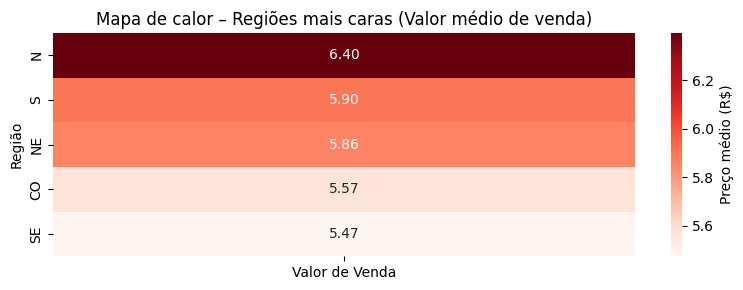

In [44]:

mean_region = df.groupby('Regiao - Sigla')['Valor de Venda'].mean().reset_index()

mean_region = mean_region.sort_values(by='Valor de Venda', ascending=False)

plt.figure(figsize=(8, 3))
sns.heatmap(
    mean_region[['Valor de Venda']].set_index(mean_region['Regiao - Sigla']),
    annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Preço médio (R$)'}
)
plt.title('Mapa de calor – Regiões mais caras (Valor médio de venda)')
plt.ylabel('Região')
plt.xlabel('')
plt.tight_layout()
plt.show()

